# Bicycle Thefts in Toronto

In [1]:
# Suggested Tasks:

# Data Exploration: Familiarize yourself with the dataset. Identify key variables such as date, location, bike type, etc.

# Temporal Analysis: Analyze temporal trends in bicycle thefts. Are there seasons or times of day when thefts are more frequent?

# Geographical Analysis: Map the locations of bicycle thefts. Are there particular areas that are more heavily affected?

# Profiles of Stolen Bikes: Examine characteristics of stolen bikes (brand, model, color). Are there specific types of bikes that are targeted more often?

# Theft Network: Explore the possibility of links between bicycle thefts. Are there patterns indicating organized operations?

# Predictive Factors: Identify potential predictive factors for bicycle thefts. This could include variables such as weather, holidays, etc.

# Recommendations: Formulate recommendations based on your analyses to help the police prevent bicycle thefts and improve recovery.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# loading the data and taking a look at the first 5 rows
df_bicycle = pd.read_csv('data\Bicycle_Thefts_Open_Data.csv')
df = df_bicycle.copy()
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\kyana\AppData\Local\Temp\ipykernel_6340\3012644759.py:2: SyntaxWarning: invalid escape sequence '\B'
  df_bicycle = pd.read_csv('data\Bicycle_Thefts_Open_Data.csv')


,X,Y,OBJECTID,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DOW,REPORT_DAY,REPORT_DOY,REPORT_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8840398.79,5413057.03,1,GO-20141263784,PROPERTY - FOUND,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,18,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,18,D14,"Single Home, House (Attach Garage, Cottage, Mo...",House,TREK,SOHO S,RG,1.00,BLK,NaN,RECOVERED,80,Palmerston-Little Italy,80,Palmerston-Little Italy (80),-79.41,43.66
1,-8843626.12,5409538.96,2,GO-20141261431,THEFT UNDER,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,7,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,7,D14,"Apartment (Rooming House, Condo)",Apartment,SUPERCYCLE,NaN,MT,10.00,NaN,NaN,STOLEN,85,South Parkdale,85,South Parkdale (85),-79.44,43.64
2,-8838282.52,5409902.51,3,GO-20141263544,B&E,2013/12/26 05:00:00+00,2013,December,Thursday,26,360,19,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,17,D14,Other Commercial / Corporate Places (For Profi...,Commercial,FELT,F59,RC,21.00,SILRED,1300.00,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.40,43.64
3,-8842058.81,5421970.66,4,GO-20141266048,THEFT UNDER,2013/12/30 05:00:00+00,2013,December,Monday,30,364,17,2014/01/02 05:00:00+00,2014,January,Thursday,2,2,8,D53,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,KHS,VITAMIN A,OT,24.00,WHI,500.00,STOLEN,39,Bedford Park-Nortown,39,Bedford Park-Nortown (39),-79.43,43.72
4,-8838072.94,5410325.76,5,GO-20149000090,THEFT UNDER,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,12,2014/01/02 05:00:00+00,2014,January,Thursday,2,2,20,D52,"Apartment (Rooming House, Condo)",Apartment,GI,TCX2 (2010),OT,9.00,BLU,1019.00,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.39,43.64


In [4]:
# checking the shape of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35325 entries, 0 to 35324
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  35325 non-null  float64
 1   Y                  35325 non-null  float64
 2   OBJECTID           35325 non-null  int64  
 3   EVENT_UNIQUE_ID    35325 non-null  object 
 4   PRIMARY_OFFENCE    35325 non-null  object 
 5   OCC_DATE           35325 non-null  object 
 6   OCC_YEAR           35325 non-null  int64  
 7   OCC_MONTH          35325 non-null  object 
 8   OCC_DOW            35325 non-null  object 
 9   OCC_DAY            35325 non-null  int64  
 10  OCC_DOY            35325 non-null  int64  
 11  OCC_HOUR           35325 non-null  int64  
 12  REPORT_DATE        35325 non-null  object 
 13  REPORT_YEAR        35325 non-null  int64  
 14  REPORT_MONTH       35325 non-null  object 
 15  REPORT_DOW         35325 non-null  object 
 16  REPORT_DAY         353

In [5]:
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

In [6]:
# describing the data to get a better understanding of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,35325.00,-8756347.59,846437.01,-8863505.63,-8840818.57,-8837723.42,-8835727.45,0.00
Y,35325.00,5365059.49,518634.78,0.00,5411475.83,5413315.25,5416533.22,5440288.68
OBJECTID,35325.00,17663.00,10197.59,1.00,8832.00,17663.00,26494.00,35325.00
OCC_YEAR,35325.00,2018.44,2.80,1975.00,2016.00,2018.00,2021.00,2024.00
OCC_DAY,35325.00,15.65,8.63,1.00,8.00,16.00,23.00,31.00
OCC_DOY,35325.00,200.64,78.52,1.00,150.00,204.00,259.00,366.00
OCC_HOUR,35325.00,13.29,6.54,0.00,9.00,14.00,18.00,23.00
REPORT_YEAR,35325.00,2018.46,2.78,2014.00,2016.00,2018.00,2021.00,2024.00
REPORT_DAY,35325.00,15.97,8.60,1.00,9.00,16.00,23.00,31.00
REPORT_DOY,35325.00,201.56,78.84,1.00,151.00,205.00,260.00,366.00


In [7]:
# checking for missing values
df.isnull().sum()

X                        0
Y                        0
OBJECTID                 0
EVENT_UNIQUE_ID          0
PRIMARY_OFFENCE          0
OCC_DATE                 0
OCC_YEAR                 0
OCC_MONTH                0
OCC_DOW                  0
OCC_DAY                  0
OCC_DOY                  0
OCC_HOUR                 0
REPORT_DATE              0
REPORT_YEAR              0
REPORT_MONTH             0
REPORT_DOW               0
REPORT_DAY               0
REPORT_DOY               0
REPORT_HOUR              0
DIVISION                 0
LOCATION_TYPE            0
PREMISES_TYPE            0
BIKE_MAKE              173
BIKE_MODEL           13177
BIKE_TYPE                0
BIKE_SPEED             632
BIKE_COLOUR           3091
BIKE_COST             2399
STATUS                   0
HOOD_158                 0
NEIGHBOURHOOD_158        0
HOOD_140                 0
NEIGHBOURHOOD_140        0
LONG_WGS84               0
LAT_WGS84                0
dtype: int64

In [8]:
# checking for the percentage of missing values
# we dont need the columns with more than 50% missing values
df.isnull().mean() * 100

X                    0.00
Y                    0.00
OBJECTID             0.00
EVENT_UNIQUE_ID      0.00
PRIMARY_OFFENCE      0.00
OCC_DATE             0.00
OCC_YEAR             0.00
OCC_MONTH            0.00
OCC_DOW              0.00
OCC_DAY              0.00
OCC_DOY              0.00
OCC_HOUR             0.00
REPORT_DATE          0.00
REPORT_YEAR          0.00
REPORT_MONTH         0.00
REPORT_DOW           0.00
REPORT_DAY           0.00
REPORT_DOY           0.00
REPORT_HOUR          0.00
DIVISION             0.00
LOCATION_TYPE        0.00
PREMISES_TYPE        0.00
BIKE_MAKE            0.49
BIKE_MODEL          37.30
BIKE_TYPE            0.00
BIKE_SPEED           1.79
BIKE_COLOUR          8.75
BIKE_COST            6.79
STATUS               0.00
HOOD_158             0.00
NEIGHBOURHOOD_158    0.00
HOOD_140             0.00
NEIGHBOURHOOD_140    0.00
LONG_WGS84           0.00
LAT_WGS84            0.00
dtype: float64

In [9]:
# checking for duplicates
df.duplicated().sum()

0

In [10]:
# datetime

In [11]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DOW,REPORT_DAY,REPORT_DOY,REPORT_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8840398.79,5413057.03,1,GO-20141263784,PROPERTY - FOUND,2014-01-01 05:00:00+00:00,2014,January,Wednesday,1,1,18,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,18,D14,"Single Home, House (Attach Garage, Cottage, Mo...",House,TREK,SOHO S,RG,1.00,BLK,NaN,RECOVERED,80,Palmerston-Little Italy,80,Palmerston-Little Italy (80),-79.41,43.66
1,-8843626.12,5409538.96,2,GO-20141261431,THEFT UNDER,2014-01-01 05:00:00+00:00,2014,January,Wednesday,1,1,7,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,7,D14,"Apartment (Rooming House, Condo)",Apartment,SUPERCYCLE,NaN,MT,10.00,NaN,NaN,STOLEN,85,South Parkdale,85,South Parkdale (85),-79.44,43.64
2,-8838282.52,5409902.51,3,GO-20141263544,B&E,2013-12-26 05:00:00+00:00,2013,December,Thursday,26,360,19,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,17,D14,Other Commercial / Corporate Places (For Profi...,Commercial,FELT,F59,RC,21.00,SILRED,1300.00,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.40,43.64
3,-8842058.81,5421970.66,4,GO-20141266048,THEFT UNDER,2013-12-30 05:00:00+00:00,2013,December,Monday,30,364,17,2014/01/02 05:00:00+00,2014,January,Thursday,2,2,8,D53,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,KHS,VITAMIN A,OT,24.00,WHI,500.00,STOLEN,39,Bedford Park-Nortown,39,Bedford Park-Nortown (39),-79.43,43.72
4,-8838072.94,5410325.76,5,GO-20149000090,THEFT UNDER,2014-01-01 05:00:00+00:00,2014,January,Wednesday,1,1,12,2014/01/02 05:00:00+00,2014,January,Thursday,2,2,20,D52,"Apartment (Rooming House, Condo)",Apartment,GI,TCX2 (2010),OT,9.00,BLU,1019.00,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.39,43.64


# Temporal Analysis

In [12]:
# selecting the last 10 years of data
df = df[df['OCC_YEAR'] >= 2014]
# df = df[(df['OCC_YEAR'] >= 2014) & (df['OCC_YEAR'] < 2024)]

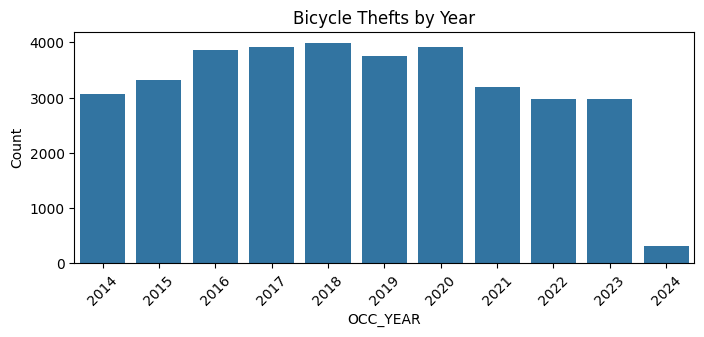

In [13]:
# checking the number of thefts by year
# on this graph we can appreciate a growing pattern since 2014 to 2018
# the number of thefts has been decreasing over the last few years
# i dont have full data for 2024 to analyze
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='OCC_YEAR')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Bicycle Thefts by Year')
plt.show()


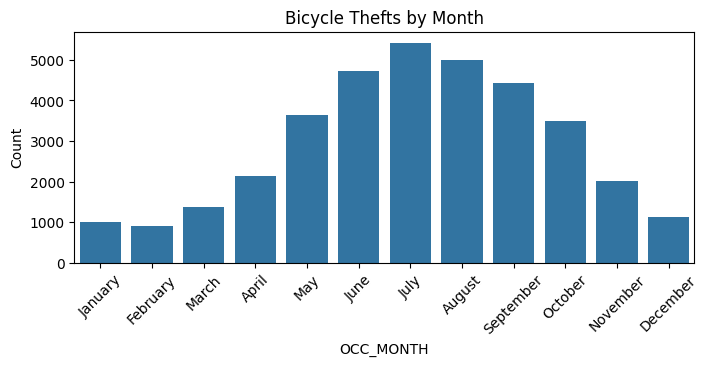

In [14]:
# checking the number of thefts by month
# There is a seasonality in thefts. Bicycle thefts increase in summer with a peak in July.
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='OCC_MONTH')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Bicycle Thefts by Month')
plt.show()

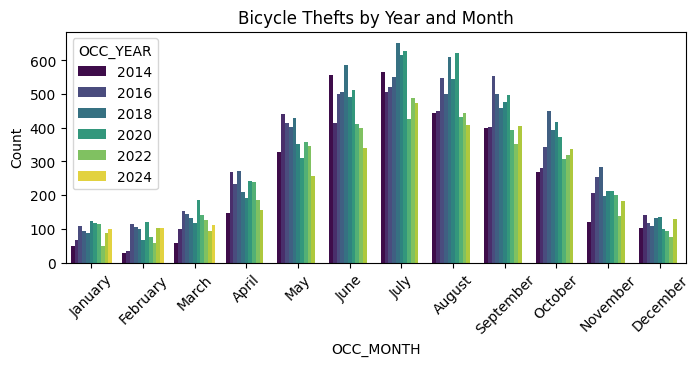

In [15]:
# checking the number of thefts by year and month. 
# from december 2023 to february 2024 there is a increase in the number of thefts compared to the previous years.
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='OCC_MONTH', hue='OCC_YEAR', palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Bicycle Thefts by Year and Month')
plt.show()

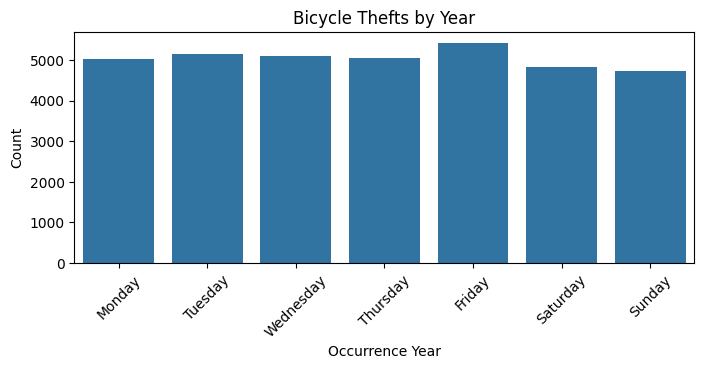

In [16]:
# checking the number of thefts by day of the week.
# The number of thefts is higher on weekdays than weekends with a peak on Friday.
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='OCC_DOW', 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              )
plt.xticks(rotation=45)
plt.xlabel('Occurrence Year')
plt.ylabel('Count')
plt.title('Bicycle Thefts by Year')
plt.show()

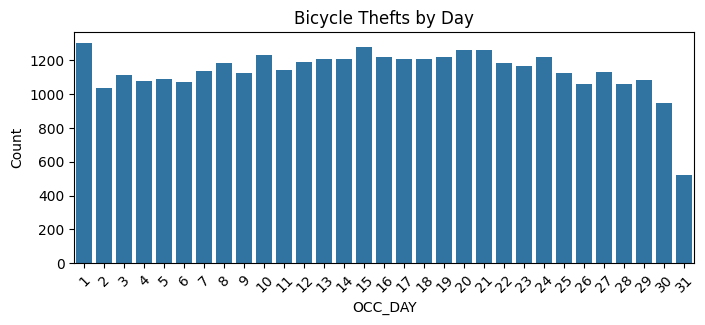

In [38]:
# checking the number of thefts by day of the month
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='OCC_DAY')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Bicycle Thefts by Day')
plt.show()

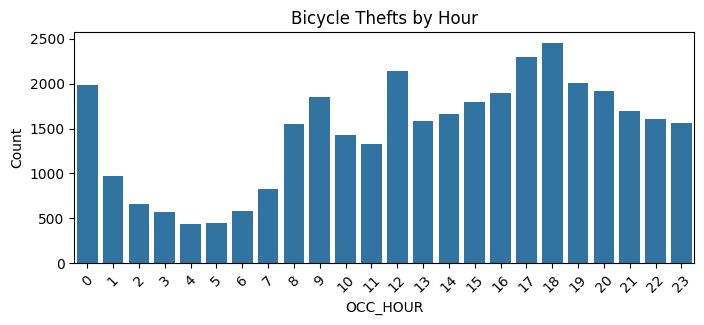

In [36]:
# checking the number of thefts by hour
# The number of thefts is higher during the day with a peak between 17:00 - 18:00.
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='OCC_HOUR')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Bicycle Thefts by Hour')
plt.show()

In [32]:
# thefts_per_day = df.groupby(df['OCC_DATE'].dt.date)['EVENT_UNIQUE_ID'].nunique()
# df.pivot_table(index='OCC_MONTH', columns='OCC_YEAR', values='EVENT_UNIQUE_ID', aggfunc='nunique')

OCC_YEAR,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
OCC_MONTH,,,,,,,,,,,
1,47.00,64.00,97.00,76.00,78.00,114.00,103.00,100.00,44.00,81.00,87.00
2,25.00,26.00,100.00,89.00,85.00,63.00,92.00,65.00,53.00,87.00,99.00
3,53.00,91.00,133.00,120.00,123.00,98.00,160.00,125.00,110.00,89.00,101.00
4,135.00,243.00,216.00,238.00,187.00,172.00,207.00,210.00,170.00,148.00,NaN
5,300.00,402.00,377.00,357.00,381.00,303.00,259.00,303.00,304.00,233.00,NaN
6,530.00,380.00,470.00,464.00,521.00,429.00,440.00,356.00,364.00,315.00,NaN
7,518.00,470.00,465.00,500.00,589.00,549.00,530.00,371.00,450.00,413.00,NaN
8,411.00,403.00,496.00,453.00,532.00,496.00,531.00,369.00,398.00,376.00,NaN
9,360.00,362.00,467.00,459.00,391.00,424.00,437.00,349.00,319.00,379.00,NaN


# Geographical Analysis

# Profiles of Stolen Bikes

# Theft Network

# Predictive Factors

# Recommendations

Ideas:
- create pivot table (year / stolen_count), (year / city) mb group by index: year, city, type of bike. mb premises_type/stolen_count
- watch correlation between cost and stolen_count


In [18]:
# # Define the order of the months
# month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# # Convert 'OCC_MONTH' to a categorical type with the specified order
# df['OCC_MONTH'] = pd.Categorical(df['OCC_MONTH'], categories=month_order, ordered=True)

# # Now, create the plot
# df.groupby(['OCC_YEAR', 'OCC_MONTH']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 4), colormap='viridis')